# Model for Customer Churn Prediction

In [1]:
import pandas as pd

In [2]:
df=pd.read_excel("Churn.xlsx")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df.dropna(axis=0, inplace=True)
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
df.drop("customerID", axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Analyzing the Dataset

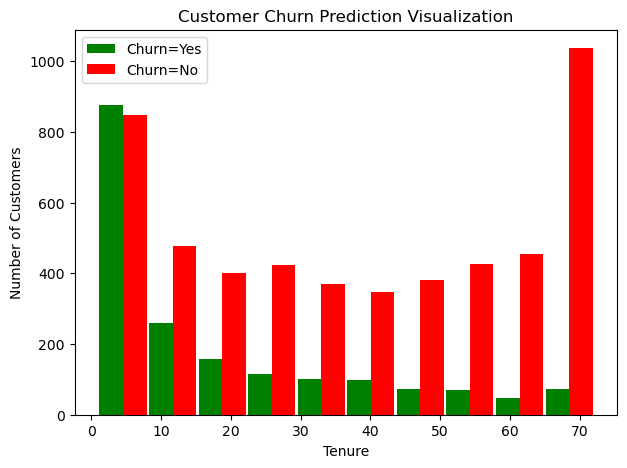

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline
churn_no=df[df.Churn=='No'].tenure
churn_yes=df[df.Churn=='Yes'].tenure
plt.figure(figsize=(7, 5))
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([churn_yes, churn_no], rwidth=0.95, color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()
plt.show()

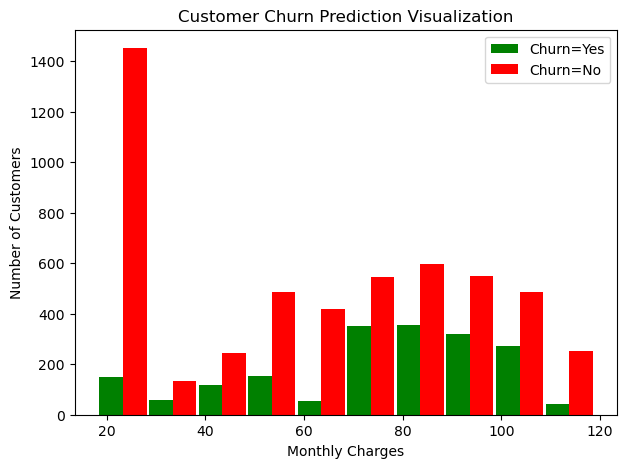

In [11]:
churn_no=df[df.Churn=='No'].MonthlyCharges
churn_yes=df[df.Churn=='Yes'].MonthlyCharges
plt.figure(figsize=(7, 5))
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([churn_yes, churn_no], rwidth=0.95, color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()
plt.show()

## Data Preprocessing and Building Predictive Model

In [12]:
def col_unique_val(df):
    for col in df.columns:
        if df[col].dtypes=="object":
            print(f"{col}:{df[col].unique()}")
col_unique_val(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [13]:
df=df.replace(["No internet service", "No phone service"], "No")
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [14]:
yes_no_columns=['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
for col in yes_no_columns:
    df[col].replace({"Yes":1, "No":0}, inplace=True)
df['gender'].replace({"Female":1, "Male":0}, inplace=True)
col_unique_val(df)

InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [15]:
df1=pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [16]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [17]:
cols_scale=["tenure", "TotalCharges", "MonthlyCharges"]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1[cols_scale]=scaler.fit_transform(df[cols_scale])
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalCharges'>

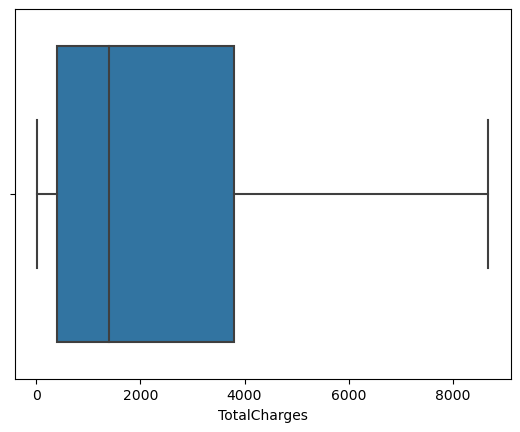

In [18]:
import seaborn as sns
sns.boxplot(df.TotalCharges)

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharges'>

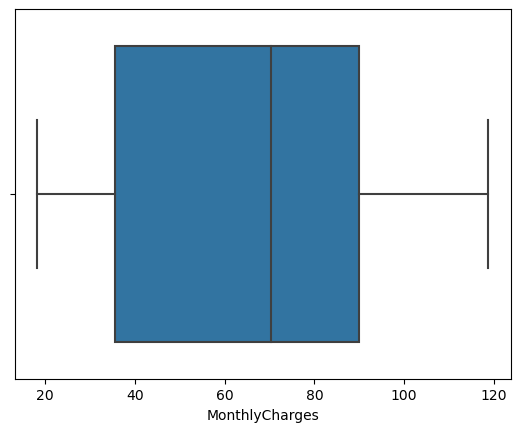

In [19]:
sns.boxplot(df.MonthlyCharges)

In [20]:
df1.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [21]:
churn_rate=1869/(5163+1869)*100
churn_rate

26.578498293515356

In [22]:
count_class_0, count_class_1=df1.Churn.value_counts()
df_class_0=df1[df1['Churn']==0]
df_class_1=df1[df1['Churn']==1]

In [23]:
df_class_1_over=df_class_1.sample(count_class_0, replace=True)
df_final=pd.concat([df_class_0, df_class_1_over], axis=0)
df_final.Churn.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [24]:
X=df_final.drop('Churn', axis=1)
Y=df_final.Churn

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=10, )

In [26]:
y_train.value_counts()

1    3632
0    3596
Name: Churn, dtype: int64

In [27]:
y_test.value_counts()

0    1567
1    1531
Name: Churn, dtype: int64

## Fit Data to Different Models and Compare Accuracy

In [28]:
accuracy_models={}

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
logreg=LogisticRegression(random_state=0)
logreg.fit(x_train, y_train)
y_pred_lr=logreg.predict(x_test)

In [30]:
accuracy_models['Logistic Regression']=accuracy_score(y_test, y_pred_lr)

In [31]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1567
           1       0.75      0.83      0.79      1531

    accuracy                           0.78      3098
   macro avg       0.78      0.78      0.78      3098
weighted avg       0.78      0.78      0.78      3098



In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn=knn.predict(x_test)

E:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [33]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.66      0.75      1567
           1       0.72      0.88      0.79      1531

    accuracy                           0.77      3098
   macro avg       0.79      0.77      0.77      3098
weighted avg       0.79      0.77      0.77      3098



In [34]:
accuracy_models['KNN']=accuracy_score(y_test, y_pred_knn)

In [35]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred_tree=tree.predict(x_test)

In [36]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1567
           1       0.81      0.92      0.86      1531

    accuracy                           0.85      3098
   macro avg       0.86      0.85      0.85      3098
weighted avg       0.86      0.85      0.85      3098



In [37]:
accuracy_models['Decision Tree']=accuracy_score(y_test, y_pred_tree)

In [38]:
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier()
rand.fit(x_train, y_train)
y_pred_rand=rand.predict(x_test)

In [39]:
print(classification_report(y_test, y_pred_rand))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1567
           1       0.84      0.94      0.89      1531

    accuracy                           0.88      3098
   macro avg       0.89      0.88      0.88      3098
weighted avg       0.89      0.88      0.88      3098



In [40]:
accuracy_models['Random Forest Classifier']=accuracy_score(y_test, y_pred_tree)

In [41]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train, y_train)
y_pred_svm=svm.predict(x_test)

In [42]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1567
           1       0.75      0.86      0.81      1531

    accuracy                           0.79      3098
   macro avg       0.80      0.79      0.79      3098
weighted avg       0.80      0.79      0.79      3098

